# Labb-utskriftsprogrammet
### Välkommen - följ instruktionerna nedan

1. I menyn "Run", välj "Run all cells" (längst ner i menyn).
2. Scrolla längst ner i det här dokumentet till rubriken "Använd programmet här"

<img src="https://res.cloudinary.com/practicaldev/image/fetch/s--4nVcu5jx--/c_limit%2Cf_auto%2Cfl_progressive%2Cq_66%2Cw_880/https://cdn.dribbble.com/users/722835/screenshots/4082720/bot_icon.gif" style="max-width:500px;" align="left">

In [1]:
from pprint import pprint
import os
import re
import time
from time import sleep

from pynput.mouse import Button, Controller as MouseCtrlr
from pynput.keyboard import Key, Controller as KeyCtrlr
import pyautogui as pag
import keyboard as keyboard


from matplotlib import pyplot as plt
from PIL import Image
import cv2 as cv
import numpy as np

In [2]:
# import pytesseract as tess
# tess.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract'

In [3]:
# some handy functions to use along widgets
from IPython.display import display, Markdown, clear_output
# widget packages
import ipywidgets as widgets
from termcolor import colored, cprint

In [4]:
import win32clipboard
import pyperclip
from IPython.display import clear_output
from statistics import median
from subprocess import check_output

# Helper functions

In [7]:
def imshow(img, cmap=None, size=10):
    if type(img) == str:
        img = cv.imread(img)
    elif(not type(img) == np.ndarray):
        return
    
    fig = plt.figure(figsize=(size,size))
    ax = plt.Axes(fig, [0,0,1,1])
    ax.set_axis_off()
    fig.add_axes(ax)
    ax.imshow(img, cmap)

In [8]:
def get_inverted(image):
    return cv.bitwise_not(image)

# get grayscale image
def get_grayscale(image):
    return cv.cvtColor(image, cv.COLOR_BGR2GRAY)

#thresholding
def thresholding(image, threshold=180):
    return cv.threshold(image, threshold, 255, cv.THRESH_BINARY)[1]
    #return cv.adaptiveThreshold(image, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY,11,2)
    
def thresholdingAdaptive(image):
    return cv.adaptiveThreshold(image, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY,11,2)

In [9]:
kb = KeyCtrlr()

In [10]:
class Pos:
    def __init__(self, x = 0, y = 0):
        self.x = x
        self.y = y
        
    def __str__(self):
        return f"({self.x}, {self.y})"
    
    def __repr__(self):
        return f"({self.x}, {self.y})"
    
    def __bool__(self):
        return True

In [11]:
def message(str):
    return pag.confirm(str)

In [12]:
globalWaitTime = 1
globalLimitTime = 3
globalWaitBeforeStart = 0.2

def getWaitAndLimit(beforeStart = -1, limit = -1, wait = -1):
    if wait == -1:
        wait = globalWaitTime
    if limit == -1:
        limit = globalLimitTime
    if beforeStart == -1:
        beforeStart = globalWaitBeforeStart
        
    return (beforeStart, limit, wait)

In [13]:
def waitForElement(path, beforeStart = -1, limit = -1, waitTime = -1, conf = 0.9, warn = True):
    timePassed = 0
    beforeStart, limit, waitTime = getWaitAndLimit(beforeStart, limit, waitTime)
    sleep(beforeStart)
        
    
    while timePassed < limit:
        try:
            x, y = pag.locateCenterOnScreen(path, confidence = conf)
            return Pos(x, y)
        except Exception as e:
            pass
            #print(str(e))
            
        sleep(waitTime)
        timePassed += waitTime
    
    if warn:
        message("Timed out waiting for element " + path)
    return False
        
#waitForElement("SokValjPatient")

In [14]:
def waitForElementDisappear(path, beforeStart = -1, limit = -1, waitTime = -1, conf = 0.9, warn = True):
    timePassed = 0
    beforeStart, limit, waitTime = getWaitAndLimit(beforeStart, limit, waitTime)
    sleep(beforeStart)
    
    while timePassed < limit:
        try:
            x, y = pag.locateCenterOnScreen(path, confidence = conf)
        except Exception as e:
            if (str(e) == "cannot unpack non-iterable NoneType object"):
                return True
            else:
                print(str(e))
            
        sleep(waitTime)
        timePassed += waitTime
    
    if warn:
        message("Timed out waiting for element disappear " + path)
    return False


In [15]:
def waitForOneOf(pathList, beforeStart = -1, limit = -1, waitTime = -1, conf = 0.9, warn = True):
    timePassed = 0
    beforeStart, limit, waitTime = getWaitAndLimit(beforeStart, limit, waitTime)
    sleep(beforeStart)
    
    while timePassed < limit:
        for path in pathList:
            pos = waitForElement(path, beforeStart = 0, limit = 0.01, waitTime = 0.01, conf = conf, warn = False)
            timePassed += 0.01
            if pos:
                return pos
            
        sleep(waitTime)
        timePassed += waitTime
        
    if warn:
        message("Timed out waiting for element list " + str(pathList))
        
    return False
    
#waitForOneOf(["FleraIFoljd", "osrsakskod1IcdFalt", "sokDiagnos"], limit=2)

In [16]:
def waitAndClickOneOf(pathList, relX = 0, relY = 0, beforeStart = -1, limit = -1, waitTime = -1, conf = 0.9, warn = True, button = "left"):
    pos = waitForOneOf(pathList, beforeStart = beforeStart, limit = limit, waitTime = waitTime, conf = conf, warn = warn)
    
    if pos:
        pos.x += relX
        pos.y += relY
        
        if button == "left":
            pag.leftClick(pos.x, pos.y)
        elif button == "right":
            pag.rightClick(pos.x, pos.y)
            
        return pos
    
    return False


#waitAndClickOneOf(["FleraIFoljd", "osrsakskod1IcdFalt", "sokDiagnos"])

In [17]:
def waitAndClickElement(path, relX = 0, relY = 0, beforeStart = -1, limit = -1, waitTime = -1, conf = 0.9, warn = True, button="left"):
    pos = waitForElement(path, beforeStart, limit, waitTime, conf, warn=warn)
    
    if pos:
        pos.x += relX
        pos.y += relY
        #print(f'Moving to {pos.x}, {pos.y}')
        
        if button == "left":
            pag.leftClick(pos.x, pos.y)
        elif button == "right":
            pag.rightClick(pos.x, pos.y)
        elif button == "double":
            pag.doubleClick(pos.x, pos.y)
        return pos
    else:
        return False

#waitAndClickElement("SokValjPatient")

In [18]:
def waitAndClickXY(x, y, beforeStart = -1, waitTime = -1, button="left"):
    pos = Pos(x, y)
    return waitAndClick([pos], beforeStart = beforeStart, waitTime = waitTime, button=button)

def waitAndClick(positions, beforeStart = -1, waitTime = -1, button="left"):
    beforeStart, limit, waitTime = getWaitAndLimit(beforeStart = beforeStart, wait = waitTime)
    
    try:
        if type(positions) != list and type(positions) != tuple:
            positions = [positions]

        #print(f"Sleeping {beforeStart} before starting")
        sleep(beforeStart)
        for i, pos in enumerate(positions):
            if type(pos) == list or type(pos) == tuple:
                posObj = Pos(pos[0], pos[1])
            else:
                posObj = pos
            
            #print(text)
            if button == "left":
                pag.leftClick(posObj.x, posObj.y)
            elif button == "right":
                pag.rightClick(posObj.x, posObj.y)
            if i != len(positions) - 1:
                sleep(waitTime)
        
        return True
    except Exception as e:
        print("Faild at waitAndClick: " + str(e))
        return False
    

In [19]:
def typeSlowly(text, keyInterval):
    for ch in text:
        kb.type(ch)
        sleep(keyInterval)


In [20]:
def waitAndType(texts, beforeStart = -1, waitTime = -1, keyInterval=0):
    beforeStart, limit, waitTime = getWaitAndLimit(beforeStart = beforeStart, wait = waitTime)
    
    if keyInterval == True:
        keyInterval = 0.05
    
    try:
        if type(texts) == str:
            texts = [texts]

        sleep(beforeStart)
        for i, text in enumerate(texts):
            #print(text)
            if keyInterval <= 0:
                kb.type(text)
            else:
                typeSlowly(text, keyInterval)
                
            if i != len(texts) - 1:
                sleep(waitTime)
        
        return True
    except Exception as e:
        print("Faild at waitAndType: " + str(e))
        return False
        
        
#waitAndType(["hej", "hej2", "hej3"])
#waitAndType("hejdå")

In [21]:
def waitAndPress(key1, key2 = None, key3 = None, beforeStart = -1):
    beforeStart, limit, waitTime = getWaitAndLimit(beforeStart)
    
    sleep(beforeStart)
    
    try:
        if key2 and key3:
            keyboard.press_and_release(key1+"+"+key2+"+"+key3)
        elif key2:
            keyboard.press_and_release(key1+"+"+key2)
        else:
            keyboard.press_and_release(key1)
        return True
    except Exception as e:
        pag.confirm(f"Failed wait and press {str(key1)},{str(key2)},{str(key3)}")
        return False
    

In [22]:
def AsError(text):
    return colored(text, "red")

def AsSuccess(text):
    return colored(text, "green")

In [23]:
def PrintSuccessStatus(result, title):
    outputText = title + ":"
    resultMessage = ""
    if result:
        resultMessage = AsSuccess("Lyckades!")
    else:
        resultMessage = AsError("MISSLYCKADES!")
    print(outputText, resultMessage)
    return result

In [24]:
def CopyCommand():
    kb.press(Key.ctrl)
    sleep(0.1)
    kb.press("c")
    sleep(0.1)
    kb.release("c")
    sleep(0.1)
    kb.release(Key.ctrl)
    sleep(0.1)
    return pyperclip.paste()

# Complex function

In [25]:
class ImgsEnum:
    def __init__(self, imagesPath):
        self.ArbetsflodeLabel = os.path.join(imagesPath, "Vaccine", "ArbetsflodeLabel.png")
        self.StangButtonText = os.path.join(imagesPath, "Vaccine", "StangButtonText.png")
        self.NyDiagnosTab = os.path.join(imagesPath, "Vaccine", "NyDiagnosTab.png")
        self.KshDropdownChoice = os.path.join(imagesPath, "Vaccine", "KshDropdownChoice.png")
        self.KshDropdownChoice2 = os.path.join(imagesPath, "Vaccine", "KshDropdownChoice2.png")
        self.Icd10DropdownChoice = os.path.join(imagesPath, "Vaccine", "icd10DropdownChoice.png")
        self.IcdSearchInputField = os.path.join(imagesPath, "Vaccine", "icdSearchInputField.png")
        self.NyVaccinationSearchField = os.path.join(imagesPath, "Vaccine", "NyVaccinationSearchField.png")
        self.NyAtgardTab = os.path.join(imagesPath, "Vaccine", "NyAtgardTab.png")
        self.Covid19AtgardChoice = os.path.join(imagesPath, "Vaccine", "covid19AtgardChoice.png")
        self.VaccinationCovid19Choice = os.path.join(imagesPath, "Vaccine", "VaccinationCovid19Choice.png")
        self.AtgardRelateradCovid19 = os.path.join(imagesPath, "Vaccine", "AtgardRelateradCovid19.png")
        self.CitrixIcon = os.path.join(imagesPath, "Vaccine", "CitrixIcon.png")
        self.CitrixIcon2 = os.path.join(imagesPath, "Vaccine", "CitrixIcon2.png")
        self.LotNrLabel = os.path.join(imagesPath, "Vaccine", "LotNrLabel.png")
        self.LotNrLabel2 = os.path.join(imagesPath, "Vaccine", "LotNrLabel2.png")
        self.LotNrLabel3 = os.path.join(imagesPath, "Vaccine", "LotNrLabel3.png")
        self.LotNrLabel4 = os.path.join(imagesPath, "Vaccine", "LotNrLabel4.png")
        
        self.DosNummerInputField = os.path.join(imagesPath, "Vaccine", "DosNummerInputField.png")
        self.DosNummerInputField2 = os.path.join(imagesPath, "Vaccine", "DosNummerInputField2.png")
        self.KontraindikationNejCheckbox = os.path.join(imagesPath, "Vaccine", "KontraindikationNejCheckbox.png")
        self.NyVardkontaktTitle = os.path.join(imagesPath, "Vaccine", "NyVardkontaktTitle.png")
        self.Covid19VaccinationPatientCheckbox = os.path.join(imagesPath, "Vaccine", "Covid19VaccinationPatientCheckbox.png")
        self.VaccinationsmottagningCheckbox = os.path.join(imagesPath, "Vaccine", "VaccinationsmottagningCheckbox.png")
        self.NyDiagnosTitle = os.path.join(imagesPath, "Vaccine", "NyDiagnosTitle.png")
        self.NyAtgardTitle = os.path.join(imagesPath, "Vaccine", "NyAtgardTitle.png")
        self.NyVaccinationTab = os.path.join(imagesPath, "Vaccine", "NyVaccinationTab.png")
        self.SigneraDisabeledMenu = os.path.join(imagesPath, "Vaccine", "SigneraDisabeledMenu.png")
        self.SokTabIcdSearch = os.path.join(imagesPath, "Vaccine", "SokTabIcdSearch.png")
        
        self.VaccinationerAtgardChoice = os.path.join(imagesPath, "Vaccine", "VaccinationerAtgardChoice.png")
        self.InfluensasAtgardChoice = os.path.join(imagesPath, "Vaccine", "InfluensasAtgardChoice.png")
        self.InfluensaPneumokockerAtgardChoice = os.path.join(imagesPath, "Vaccine", "InfluensaPneumokockerAtgardChoice.png")
        self.NyVaccinationButton = os.path.join(imagesPath, "Vaccine", "NyVaccinationButton.png")
        self.LokalisationLabel =  os.path.join(imagesPath, "Vaccine", "LokalisationLabel.png")
        self.LokalisationLabel2 = os.path.join(imagesPath, "Vaccine", "LokalisationLabel2.png")
        self.VaccinationLeftMenuItem = os.path.join(imagesPath, "Vaccine", "VaccinationLeftMenuItem.png")
        self.NyVaccinationTitle = os.path.join(imagesPath, "Vaccine", "NyVaccinationTitle.png")
        self.Covid19VaccinationPafyllnad_Checkbox  = os.path.join(imagesPath, "Vaccine", "Covid19VaccinationPafyllnad_Checkbox.png")
        
        # lab
        self.VisaMenuButton = os.path.join(imagesPath, "Vaccine", "VisaMenuButton.png")
        self.TillLabel = os.path.join(imagesPath, "Vaccine", "TillLabel.png")
        self.KopieraContextMenuItem = os.path.join(imagesPath, "Vaccine", "KopieraContextMenuItem.png")
        

        
        #self. = os.path.join(imagesPath, "Vaccine", ".png")

    
IMG = ImgsEnum(os.path.join("..", "Images"))

IMG.ArbetsflodeLabel


'..\\Images\\Vaccine\\ArbetsflodeLabel.png'

In [26]:
def SignOrSave():
    foundIt = waitForElement(IMG.SigneraDisabeledMenu, limit=0.2, warn=False)
    if not foundIt:
        waitAndPress("alt", "g")
    else:
        waitAndPress("alt", "s")


In [27]:
def OpenPatient():
    pos = waitAndClickElement(IMG.ArbetsflodeLabel, relY=18, conf=0.8)
    if pos:
        waitAndType("covid")
        waitAndPress("enter")
        waitAndPress("enter")
        
        timer = 0
        
        readyPos = False
        while timer < 15 and not readyPos:
            readyPos = waitForElement(IMG.NyVaccinationSearchField, limit=2, warn=False)
            if not readyPos:
                closePos = waitAndClickElement(IMG.StangButtonText, limit=0.2, warn=False)
                if closePos:
                    waitAndClickElement(IMG.StangButtonText, beforeStart=0.5, limit=0.2, warn=False)
    
    return pos

In [28]:
def RegisterVisit(tasks, booster = False):
    waitAndPress("ctrl", "e")
    pos = waitForElement(IMG.NyVardkontaktTitle)
    if pos:
        sleep(0.3)
        waitAndType("m")
    
    if "covid" in tasks:
        if pos:
            pos = waitAndClickElement(IMG.Covid19VaccinationPatientCheckbox, relX=-81)
        if pos and booster:
            pos = waitAndClickElement(IMG.Covid19VaccinationPafyllnad_Checkbox, relX=-104)
    if pos:
        pos = waitAndClickElement(IMG.VaccinationsmottagningCheckbox, relX=-71)
        
    if pos:
        SignOrSave()
    if pos:
        pos = waitForElementDisappear(IMG.NyVardkontaktTitle)
        
    return pos


In [29]:
def SelectAndClearDiagnosisSearchField():
    pos = waitAndClickElement(IMG.SokTabIcdSearch, relY=30)
    
    if pos:
        waitAndPress("ctrl", "A")
        waitAndPress("delete")
        
    return pos



In [30]:
def SetDiagnosis(tasks):
    pos = waitAndClickElement(IMG.NyDiagnosTab)
    if pos:
        kshPos = waitAndClickOneOf([IMG.KshDropdownChoice, IMG.KshDropdownChoice2], conf=0.75, limit=0.5, warn=False)
        if kshPos:
            waitAndType("icd")
            waitAndPress("enter")
    
    if pos and "covid" in tasks:
        pos = SelectAndClearDiagnosisSearchField()
        if pos:
            waitAndType("U119")
            waitAndPress("enter")
            waitAndPress("enter")
            
    if pos and "influensa" in tasks:
        pos = SelectAndClearDiagnosisSearchField()
        if pos:
            waitAndType("Z251")
            waitAndPress("enter")
            waitAndPress("enter")
            
    if pos and "pneumokocker" in tasks:
        pos = SelectAndClearDiagnosisSearchField()
        if pos:
            waitAndType("Z238")
            waitAndPress("enter")
            waitAndPress("enter")
    
    if pos:
        SignOrSave()
    if pos:
        pos = waitForElementDisappear(IMG.NyDiagnosTitle)
    return pos


In [31]:
def SetActionCode(tasks):
    pos = waitAndClickElement(IMG.NyAtgardTab)
    
    if "covid" in tasks:
        if pos:
            pos = waitAndClickElement(IMG.Covid19AtgardChoice, relX=-31)
            if "influensa" in tasks:
                pag.scroll(-500)
                sleep(0.2)
                pag.scroll(-500)
                sleep(0.2)
        if pos:
            pos = waitAndClickElement(IMG.VaccinationCovid19Choice, button="double")
        if pos:
            pos = waitAndClickElement(IMG.AtgardRelateradCovid19, button="double")
            
    if "influensa" in tasks:
        pag.scroll(-500)
        sleep(0.2)
        pos = waitAndClickElement(IMG.VaccinationerAtgardChoice, relX=-41)
        pag.scroll(-1000)
        sleep(0.2)
        pag.scroll(-500)
        sleep(0.2)
        if pos and "pneumokocker" in tasks:
            pos = waitAndClickElement(IMG.InfluensaPneumokockerAtgardChoice, button="double")
        elif pos:
            pos = waitAndClickElement(IMG.InfluensasAtgardChoice, button="double")
        
    if pos:
        SignOrSave()
        
    if pos:
        pos = waitForElementDisappear(IMG.NyAtgardTitle)
        
    return pos

# pos = PrintSuccessStatus(waitAndClickOneOf([IMG.CitrixIcon, IMG.CitrixIcon2]), " - Öppnar PMO")
# if pos:
#     SetActionCode(["covid", "influensa"])

# Lab specific
<img src="https://media.istockphoto.com/photos/female-lab-technician-doing-research-with-a-microscope-in-the-lab-picture-id1204793213?k=20&m=1204793213&s=612x612&w=0&h=OxwfBDZRbdtUxM8mbw8OtOfPiAKAXuFvLXEMStGTCk4=" style="max-width:500px;display:block;" align="left">

In [ ]:
pos = waitAndClickOneOf([IMG.CitrixIcon, IMG.CitrixIcon2])
# if pos:
#     pos = waitAndClickElement(IMG.VisaMenuButton)
if pos:
    pos = waitForElement(IMG.TillLabel)
if pos:
    print(pos)
    pag.moveTo(pos.x, pos.y)
    sleep(0.1)
    pag.mouseDown();
    pag.moveTo(pos.x + 400, pos.y + 200, 0.3);
    sleep(0.1)
    pag.mouseUp()
    pag.moveTo(pos.x + 300, pos.y + 100, 0.1);
    pag.click(button="right")
    pos = waitAndClickElement(IMG.KopieraContextMenuItem)
    testsStr = pyperclip.paste()

print(testsStr)

In [34]:
keys = ["origo", "pk","apt","dDimer","fibrinogen","antitrombin","osmolalitet","ld","caJon","digoxin","fenytoin","karbamazepin","paracetamol","salicylat","tobramycin","litium","vankomycin","s100B","vitaminD","folat","tsh","t4","t3","pth","psa","hcg","kortisol","prokalcitonin","crp","natrium","kalium","kreatinin","gfr","albumin","calcium","urea","fosfat","urat","magnesium","klorid","ckmb","troponinTI","myoglobin","ck","proBnp","asat","alat","gt","alp","bilirubin","bilKonj","pankreasamylas","kolesterol","tg","hdlLdl","apoA1","järnTibc","homocystein","tpo","kobalaminB12","ferritin","basöverskott","koldioxid","etanol","hba1c","hb","lkc","trc","trcMpv","trcIpfIpc","neu","diff","erc","evf","ercMcv","ercMch","rtc","rtcMch","sr","glukos",]
keyGroups = [
	["pk", "apt", "dDimer", "fibrinogen", "antitrombin", "osmolalitet", "ld", "caJon",],
	["digoxin", "fenytoin", "karbamazepin", "paracetamol", "salicylat", "tobramycin", "litium", "vankomycin", "s100B", "vitaminD", "folat",],
	["tsh", "t4", "t3", "pth", "psa", "hcg", "kortisol", "prokalcitonin", "crp",],
	["natrium", "kalium", "kreatinin", "gfr", "albumin", "calcium", "urea", "fosfat", "urat", "magnesium", "klorid",],
	["ckmb", "troponinTI", "myoglobin", "ck", "proBnp", "asat", "alat", "gt", "alp", "bilirubin", "bilKonj",],
	["pankreasamylas", "kolesterol", "tg", "hdlLdl", "apoA1", "järnTibc", "homocystein", "tpo", "kobalaminB12", "ferritin",],
	["basöverskott", "koldioxid", "etanol", "hba1c",],
	["hb", "lkc", "trc", "trcMpv", "trcIpfIpc", "neu", "diff", "glukos",],
	["erc", "evf", "ercMcv", "ercMch", "rtc", "rtcMch", "sr", ],
]
keyGroupsHorizontal = [
    ["pk", "digoxin", "tsh", "natrium", "ckmb", "pankreasamylas"],
    ["apt", "fenytoin", "t4", "kalium", "troponinTI", "kolesterol"],
    ["dDimer", "karbamazepin", "t3", "kreatinin", "myoglobin", "tg"],
    ["fibrinogen", "paracetamol", "pth", "gfr", "ck", "hdlLdl"],
    ["antitrombin", "salicylat", "psa", "albumin", "proBnp", "apoA1"],
    ["tobramycin", "hcg", "calcium", "asat"],
    ["kortisol", "urea", "alat", "järnTibc"],
    ["prokalcitonin", "fosfat", "gt", "homocystein"],
    ["crp", "urat", "alp", "tpo"],
    ["magnesium", "bilirubin", "kobalaminB12"],
    ["klorid", "bilKonj", "ferritin"],
    ["hb", "erc"],
    ["lkc", "evf"],
    ["trc", "ercMcv"],
    ["trcMpv", "ercMch"],
    ["trcIpfIpc", "rtc"],
    ["neu", "rtcMch"],
    ["diff", "sr"],
]

In [35]:
#Calculate positions
calculated = True
positionsRefined = {}

if calculated:
    positionsRefined = { 'origo': {'measuredPos': {'x': 5, 'y': 145}, 'x': 0, 'y': 0},
                         'pk': {'measuredPos': {'x': 1050, 'y': 444}, 'x': 1043, 'y': 300},
                         'apt': {'measuredPos': {'x': 1047, 'y': 422}, 'x': 1043, 'y': 272},
                         'dDimer': {'measuredPos': {'x': 1048, 'y': 392}, 'x': 1043, 'y': 243},
                         'fibrinogen': {'measuredPos': {'x': 1048, 'y': 364}, 'x': 1043, 'y': 215},
                         'antitrombin': {'measuredPos': {'x': 1048, 'y': 333}, 'x': 1043, 'y': 187},
                         'osmolalitet': {'measuredPos': {'x': 1049, 'y': 288}, 'x': 1043, 'y': 143},
                         'ld': {'measuredPos': {'x': 1048, 'y': 243}, 'x': 1043, 'y': 98},
                         'caJon': {'measuredPos': {'x': 1049, 'y': 201}, 'x': 1043, 'y': 56},
                         'digoxin': {'measuredPos': {'x': 930, 'y': 446}, 'x': 927, 'y': 300},
                         'fenytoin': {'measuredPos': {'x': 932, 'y': 416}, 'x': 927, 'y': 272},
                         'karbamazepin': {'measuredPos': {'x': 933, 'y': 388}, 'x': 927, 'y': 243},
                         'paracetamol': {'measuredPos': {'x': 931, 'y': 359}, 'x': 927, 'y': 215},
                         'salicylat': {'measuredPos': {'x': 934, 'y': 332}, 'x': 927, 'y': 187},
                         'tobramycin': {'measuredPos': {'x': 933, 'y': 306}, 'x': 927, 'y': 161},
                         'litium': {'measuredPos': {'x': 932, 'y': 271}, 'x': 927, 'y': 126},
                         'vankomycin': {'measuredPos': {'x': 931, 'y': 242}, 'x': 927, 'y': 97},
                         's100B': {'measuredPos': {'x': 931, 'y': 209}, 'x': 927, 'y': 64},
                         'vitaminD': {'measuredPos': {'x': 931, 'y': 179}, 'x': 927, 'y': 34},
                         'folat': {'measuredPos': {'x': 934, 'y': 153}, 'x': 927, 'y': 8},
                         'tsh': {'measuredPos': {'x': 803, 'y': 447}, 'x': 799, 'y': 300},
                         't4': {'measuredPos': {'x': 804, 'y': 420}, 'x': 799, 'y': 272},
                         't3': {'measuredPos': {'x': 804, 'y': 387}, 'x': 799, 'y': 243},
                         'pth': {'measuredPos': {'x': 803, 'y': 362}, 'x': 799, 'y': 215},
                         'psa': {'measuredPos': {'x': 804, 'y': 331}, 'x': 799, 'y': 187},
                         'hcg': {'measuredPos': {'x': 804, 'y': 307}, 'x': 799, 'y': 161},
                         'kortisol': {'measuredPos': {'x': 806, 'y': 278}, 'x': 799, 'y': 133},
                         'prokalcitonin': {'measuredPos': {'x': 805, 'y': 250}, 'x': 799, 'y': 105},
                         'crp': {'measuredPos': {'x': 805, 'y': 224}, 'x': 799, 'y': 78},
                         'natrium': {'measuredPos': {'x': 689, 'y': 445}, 'x': 686, 'y': 300},
                         'kalium': {'measuredPos': {'x': 693, 'y': 418}, 'x': 686, 'y': 272},
                         'kreatinin': {'measuredPos': {'x': 691, 'y': 387}, 'x': 686, 'y': 243},
                         'gfr': {'measuredPos': {'x': 693, 'y': 360}, 'x': 686, 'y': 215},
                         'albumin': {'measuredPos': {'x': 692, 'y': 334}, 'x': 686, 'y': 187},
                         'calcium': {'measuredPos': {'x': 690, 'y': 305}, 'x': 686, 'y': 161},
                         'urea': {'measuredPos': {'x': 689, 'y': 278}, 'x': 686, 'y': 133},
                         'fosfat': {'measuredPos': {'x': 690, 'y': 249}, 'x': 686, 'y': 105},
                         'urat': {'measuredPos': {'x': 693, 'y': 223}, 'x': 686, 'y': 78},
                         'magnesium': {'measuredPos': {'x': 693, 'y': 195}, 'x': 686, 'y': 50},
                         'klorid': {'measuredPos': {'x': 690, 'y': 165}, 'x': 686, 'y': 20},
                         'ckmb': {'measuredPos': {'x': 579, 'y': 443}, 'x': 575, 'y': 300},
                         'troponinTI': {'measuredPos': {'x': 579, 'y': 416}, 'x': 575, 'y': 272},
                         'myoglobin': {'measuredPos': {'x': 582, 'y': 388}, 'x': 575, 'y': 243},
                         'ck': {'measuredPos': {'x': 580, 'y': 359}, 'x': 575, 'y': 215},
                         'proBnp': {'measuredPos': {'x': 579, 'y': 332}, 'x': 575, 'y': 187},
                         'asat': {'measuredPos': {'x': 581, 'y': 307}, 'x': 575, 'y': 161},
                         'alat': {'measuredPos': {'x': 579, 'y': 279}, 'x': 575, 'y': 133},
                         'gt': {'measuredPos': {'x': 581, 'y': 250}, 'x': 575, 'y': 105},
                         'alp': {'measuredPos': {'x': 584, 'y': 197}, 'x': 575, 'y': 78},
                         'bilirubin': {'measuredPos': {'x': 581, 'y': 197}, 'x': 575, 'y': 50},
                         'bilKonj': {'measuredPos': {'x': 580, 'y': 164}, 'x': 575, 'y': 20},
                         'pankreasamylas': {'measuredPos': {'x': 470, 'y': 447}, 'x': 463, 'y': 300},
                         'kolesterol': {'measuredPos': {'x': 469, 'y': 417}, 'x': 463, 'y': 272},
                         'tg': {'measuredPos': {'x': 468, 'y': 390}, 'x': 463, 'y': 243},
                         'hdlLdl': {'measuredPos': {'x': 466, 'y': 361}, 'x': 463, 'y': 215},
                         'apoA1': {'measuredPos': {'x': 470, 'y': 333}, 'x': 463, 'y': 187},
                         'järnTibc': {'measuredPos': {'x': 468, 'y': 276}, 'x': 463, 'y': 133},
                         'homocystein': {'measuredPos': {'x': 470, 'y': 250}, 'x': 463, 'y': 105},
                         'tpo': {'measuredPos': {'x': 469, 'y': 219}, 'x': 463, 'y': 78},
                         'kobalaminB12': {'measuredPos': {'x': 468, 'y': 194}, 'x': 463, 'y': 50},
                         'ferritin': {'measuredPos': {'x': 468, 'y': 165}, 'x': 463, 'y': 20},
                         'basöverskott': {'measuredPos': {'x': 342, 'y': 323}, 'x': 337, 'y': 178},
                         'koldioxid': {'measuredPos': {'x': 341, 'y': 280}, 'x': 337, 'y': 135},
                         'etanol': {'measuredPos': {'x': 342, 'y': 235}, 'x': 337, 'y': 90},
                         'hba1c': {'measuredPos': {'x': 344, 'y': 157}, 'x': 337, 'y': 12},
                         'hb': {'measuredPos': {'x': 211, 'y': 441}, 'x': 207, 'y': 295},
                         'lkc': {'measuredPos': {'x': 211, 'y': 414}, 'x': 207, 'y': 268},
                         'trc': {'measuredPos': {'x': 212, 'y': 383}, 'x': 207, 'y': 239},
                         'trcMpv': {'measuredPos': {'x': 212, 'y': 357}, 'x': 207, 'y': 212},
                         'trcIpfIpc': {'measuredPos': {'x': 212, 'y': 330}, 'x': 207, 'y': 185},
                         'neu': {'measuredPos': {'x': 210, 'y': 300}, 'x': 207, 'y': 155},
                         'diff': {'measuredPos': {'x': 212, 'y': 271}, 'x': 207, 'y': 123},
                         'erc': {'measuredPos': {'x': 103, 'y': 439}, 'x': 99, 'y': 295},
                         'evf': {'measuredPos': {'x': 104, 'y': 413}, 'x': 99, 'y': 268},
                         'ercMcv': {'measuredPos': {'x': 104, 'y': 385}, 'x': 99, 'y': 239},
                         'ercMch': {'measuredPos': {'x': 104, 'y': 357}, 'x': 99, 'y': 212},
                         'rtc': {'measuredPos': {'x': 104, 'y': 330}, 'x': 99, 'y': 185},
                         'rtcMch': {'measuredPos': {'x': 102, 'y': 301}, 'x': 99, 'y': 155},
                         'sr': {'measuredPos': {'x': 101, 'y': 266}, 'x': 99, 'y': 123},
                         'glukos': {'measuredPos': {'x': 213, 'y': 209}, 'x': 207, 'y': 64}}
else:
    # Sowly get mouse position for each test.
    samplePositions = {}
    for key in keys:
        print(key)
        sleep(2)
        clear_output(wait=True)
        print("################################\n################################")
        sleep(2)
        clear_output(wait=True)
        pos = pag.position()
        samplePositions[key] = pos
        print(f"{key}: {pos}")

    # Subtract origo
    positionsRefined = {}
    origo = samplePositions["origo"]
    for key, value in samplePositions.items():
        correctedPos = {"x": samplePositions[key].x - origo.x, "y": samplePositions[key].y - origo.y}
        positionsRefined[key] = {
            "measuredPos": samplePositions[key],
            "x": correctedPos["x"],
            "y": correctedPos["y"],
        }
        print(f"{key}: {positionsRefined[key]}")

    # Correct x-pos to median pos for the column.
    for group in keyGroups:
        xPositions = []
        for key in group:
            samplePos = positionsRefined[key]
            xPositions.append(samplePos["x"])
        medianPos = int(median(xPositions))

        for key in group:
            positionsRefined[key]["x"] = medianPos
        print(f"{medianPos}: {xPositions}")
        
    # Correct y-pos to median pos for the row:
    for group in keyGroupsHorizontal:
        yPositions = []
        for key in group:
            samplePos = positionsRefined[key]
            yPositions.append(samplePos["y"])
        medianPos = int(median(yPositions))

        for key in group:
            positionsRefined[key]["y"] = medianPos
        print(f"{medianPos}: {yPositions}")

In [40]:
startPoints = {}
for key in keys:
    startPoints[key] = (positionsRefined[key]["x"], positionsRefined[key]["y"])

def getStartPoint(point):
    return (point[0] - 1, point[1] - 1)
    
def getEndPoint(point):
    return (point[0] + 16, point[1] +16)

In [38]:
def fillLabTestBox(key, original):
    cv.rectangle(original, getStartPoint(startPoints[key]), getEndPoint(startPoints[key]), (0,0,0), cv.FILLED)

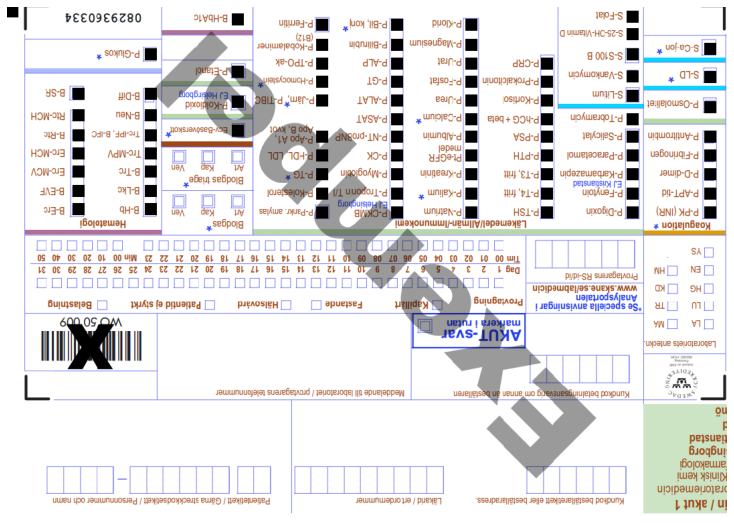

In [43]:
referralOriginal = cv.imread("Remiss.png")

for key in keys:
    fillLabTestBox(key, referralOriginal)

imshow(referralOriginal)

In [45]:
keys.remove("origo")

True

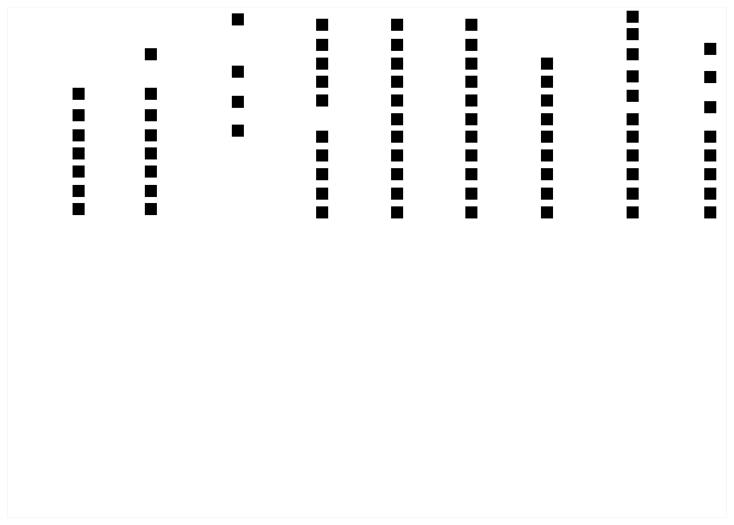

In [50]:
referralOriginal = cv.imread("RemissTom.png")

for key in keys:
    fillLabTestBox(key, referralOriginal)

imshow(referralOriginal)
cv.imwrite("output.png", referralOriginal)

In [51]:

check_output("dir C:", shell=True)

b' Volume in drive C is Windows\r\n Volume Serial Number is 0852-728A\r\n\r\n Directory of C:\\Automation\\AutoEHR\\Lab\r\n\r\n2022-07-14  13:52    <DIR>          .\r\n2022-07-14  13:52    <DIR>          ..\r\n2022-07-13  17:00    <DIR>          .ipynb_checkpoints\r\n2022-07-14  13:52           355\xff424 Lab2.ipynb\r\n2022-07-14  13:48                 0 openInPaint.bat\r\n2022-07-14  13:52            15\xff446 output.png\r\n2022-07-13  16:49             5\xff593 positionsRefined.txt\r\n2022-07-13  16:17             2\xff656 rawPositionData.txt\r\n2022-07-13  13:55           283\xff242 Remiss.png\r\n2022-07-14  12:54             5\xff121 RemissTom.png\r\n               7 File(s)        667\xff482 bytes\r\n               3 Dir(s)  143\xff364\xff165\xff632 bytes free\r\n'

In [49]:
subprocess.Popen("%s %s" % ("output.png", paintImage))

NameError: name 'subprocess' is not defined

In [60]:
import subprocess

In [70]:
proc = subprocess.Popen([r"C:\Automation\AutoEHR\Lab\openInPaint.bat"])

OSError: [WinError 193] %1 är inte ett giltigt Win32-program

# Old to remember

In [174]:
def RunFullVaccinationSequence(vaccinationDataList):
    
    print("Registrerar med...");
    
    tasks = []
    
    booster = False
    
    for data in vaccinationDataList:
        tasks.append(data["tag"])
        print(f"""Vaccin: {data["Name"]}
Batch: {data["BatchNo"]}
Dos: {data["DoseNo"]}

""")
        
        if data["DoseNo"] == "3" and data["tag"] == "covid":
            booster = True
        
    if data["BatchNo"] == "":
        print(AsError("FEL - Du måste ange ett batchnummer"))
        return
    
    finishMessage = ""
    
    finishMessage = "Misslyckades med att öppna PMO. Är det startat?"
    
    pos = PrintSuccessStatus(waitAndClickOneOf([IMG.CitrixIcon, IMG.CitrixIcon2]), " - Öppnar PMO")
    if pos:
        pos = PrintSuccessStatus(OpenPatient(), " - Öppnar patienten")
        finishMessage = "Du måste dubbelklicka på rätt patient i tidboken innan du kör programmet."
    if pos:
        pos = PrintSuccessStatus(RegisterVisit(tasks, booster), " - Besökregistrering")
        finishMessage = "Du måste själv komplettera med det som inte blev gjort. Du kan sedan köra programmet på nästa patient."
    if pos:
        pos = PrintSuccessStatus(SetDiagnosis(tasks), " - Sätter diagnos")
    if pos:
        pos = PrintSuccessStatus(SetActionCode(tasks), " - Sätter KVÅ")
    if pos:
        pos = PrintSuccessStatus(RegistreraVaccinationer(vaccinationDataList), " - Registrerar vaccin")
        
        
    if pos:
        print(AsSuccess("\nAVSLUTAR"))
        finishMessage = "Redo för en ny omgång."
    else:
        print(AsError("\nAVSLUTAR"))
        
    print("\n - " + finishMessage)


# User interface

In [175]:
vaccineDropdownCovid =  widgets.Dropdown(
                        options=['AstraZeneca', 'Moderna', 'Janssen', "Pfizer (Comirnaty)"],
                        value='AstraZeneca',
                        description='Välj vaccin:')

vaccineDictCovid = {
    'AstraZeneca': "covid-19 vaccine ast",
    'Moderna': "covid-19 vaccine mod",
    'Janssen': "covid-19 vaccine jan",
    "Pfizer (Comirnaty)": "comirnaty"
}


vaccineDropdownInfluensa =  widgets.Dropdown(
                        options=['Influvac Tetra', 'Vaxigrip Tetra'],
                        value='Influvac Tetra',
                        description='Välj vaccin:')

vaccineDictInfluensa = {
    'Influvac Tetra': "Influvac T",
    'Vaxigrip Tetra': "Vaxigrip T",
}


doseDropdownCovid = widgets.Dropdown(
               options=['Dos 1', 'Dos 2', "Dos 3"],
               value='Dos 1',
               description='Välj dos:')

doseDict = {
    "Dos 1": "1",
    "Dos 2": "2",
    "Dos 3": "3"
}

batchTextFieldCovid = widgets.Text(
                      value='',
                      description='Skriv batchnummer', )

batchTextFieldInfluensa = widgets.Text(
                      value='',
                      description='Skriv batchnummer', )

batchTextFieldPneumo = widgets.Text(
                      value='',
                      description='Skriv batchnummer', )

startButtonCovid = widgets.Button(description='Starta Covid-19', 
                             style=widgets.ButtonStyle(button_color="rgb(40,80,200)"))
startButtonInfluensa = widgets.Button(description='Starta Influensa', 
                             style=widgets.ButtonStyle(button_color="rgb(40,80,200)"))
startButtonCovidInflu = widgets.Button(description='Starta Covid+Influensa', 
                             style=widgets.ButtonStyle(button_color="rgb(40,80,200)"))
startButtonInfluensaPneumo = widgets.Button(description='Starta Influensa+Pneumokock', 
                             style=widgets.ButtonStyle(button_color="rgb(40,80,200)"))

outputArea =  widgets.Output()


covidLabel = widgets.HTML(
    value="<h2>Covid-19</h2>",
    placeholder='Covid-19',
)

influensaLabel = widgets.HTML(
    value="<h2>Influensa</h2>",
    placeholder='Influensa',
)

pneumoLabel = widgets.HTML(
    value="<h2>Pneumokocker</h2>",
    placeholder='Influensa',
)

runLabel = widgets.HTML(
    value="<h2>Kör programmet</h2>",
    placeholder='Kör programmet',
)

covidColumn = widgets.VBox([covidLabel,
                            vaccineDropdownCovid, 
                            doseDropdownCovid, 
                            batchTextFieldCovid, ])

pneumoColumn = widgets.VBox([pneumoLabel,
                             batchTextFieldPneumo])

influensaColumn = widgets.VBox([influensaLabel,
                                vaccineDropdownInfluensa,
                                batchTextFieldInfluensa,
                                pneumoColumn])

inputArea = widgets.HBox(  [covidColumn,
                            influensaColumn])

runArea = widgets.VBox(    [runLabel,
                            startButtonCovid,
                            startButtonInfluensa,
                            startButtonCovidInflu,
                            startButtonInfluensaPneumo])

outputColumn = widgets.VBox( [outputArea])

runAndOutputArea = widgets.HBox ([runArea, 
                                  outputColumn])


Interface = widgets.VBox(  [inputArea,
                            runAndOutputArea])

def onCovid(_):
    vaccinationDataList = [{
        "tag": "covid",
        "Name": vaccineDictCovid[vaccineDropdownCovid.value],
        "DoseNo": doseDict[doseDropdownCovid.value],
        "BatchNo": batchTextFieldCovid.value,
        "site": "vä ö"
    }]

    run(vaccinationDataList)

    
def onInfluensa(_):
    vaccinationDataList = [{
        "tag": "influensa",
        "Name": vaccineDictInfluensa[vaccineDropdownInfluensa.value],
        "DoseNo": "1",
        "BatchNo": batchTextFieldInfluensa.value,
        "site": "vä ö"
    }]
    
    run(vaccinationDataList)
        
        
def onCovidInflu(_):
    vaccinationDataList = [
        {
            "tag": "covid",
            "Name": vaccineDictCovid[vaccineDropdownCovid.value],
            "DoseNo": doseDict[doseDropdownCovid.value],
            "BatchNo": batchTextFieldCovid.value,
            "site": "vä ö"
        },
        {
            "tag": "influensa",
            "Name": vaccineDictInfluensa[vaccineDropdownInfluensa.value],
            "DoseNo": "1",
            "BatchNo": batchTextFieldInfluensa.value,
            "site": "hö ö"
        }]
    
    run(vaccinationDataList)
    
        
def onInfluensaPneumo(_):
    vaccinationDataList = [{
            "tag": "influensa",
            "Name": vaccineDictInfluensa[vaccineDropdownInfluensa.value],
            "DoseNo": "1",
            "BatchNo": batchTextFieldInfluensa.value,
            "site": "vä ö"
        },
        {
            "tag": "pneumokocker",
            "Name": "pneumo",
            "DoseNo": "1",
            "BatchNo": batchTextFieldPneumo.value,
            "site": "hö ö"
        }
    ]
    
    run(vaccinationDataList)
    

def run(vaccinationDataList):
    # "linking function with output"
    with outputArea:
        # what happens when we press the button
        clear_output()
        RunFullVaccinationSequence(vaccinationDataList)
        
# linking button and function together using a button's method
startButtonCovid.on_click(onCovid)
startButtonInfluensa.on_click(onInfluensa)
startButtonCovidInflu.on_click(onCovidInflu)
startButtonInfluensaPneumo.on_click(onInfluensaPneumo)


<br/>
<br/>
<img src="https://media.istockphoto.com/vectors/cute-cartoon-car-set-with-dash-line-and-horizontal-road-baby-kids-vector-id1141945630" style="max-width:500px;display:block;" align="left">

# Använd programmet här!
1. Välj vaccin, dos och skriv in batch nummer för de vaccin som är relevanta.
2. Dubbelklicka på rätt patient i tidboken i PMO, men gå inte in i journalen.
3. Om du inte själv är sjuksköterska eller läkare, välj att du arbetar rollen som sjuksköterska
4. Klicka på Starta för de vaccin du ska ge.
5. När du är klar med en patient kan du börja om från nr 2 ovan med nästa patient.

**Notera:** Om fler än ett vaccin används på samma gång, sparas de. Du måste du själv kontrollera vaccinen i vaccinationslistan och signera dem (med alt+g) om inget ska ändras.

In [176]:
Interface

<img src="https://cdn.pixabay.com/photo/2014/10/19/04/52/light-494011__340.png" style="max-width:500px;display:block;" align="left">
